In [18]:
import os
JSON_DIR = "D:\JSON_stored\mbnetv2"
CSV_DIR_SLOWFAST = "D:\JSON_stored\slowfast"
MBNET_COLOR = (0,0,1)
SLOWFAST_COLOR = (1,0,0)
os.listdir(JSON_DIR)

['run-mobilenet_v2-tag-train_batch_loss.csv',
 'run-mobilenet_v2-tag-train_batch_loss.json',
 'run-mobilenet_v2-tag-train_batch_prec1.json',
 'run-mobilenet_v2-tag-train_epoch_loss.csv',
 'run-mobilenet_v2-tag-train_epoch_prec1.csv',
 'run-mobilenet_v2-tag-train_loss.csv',
 'run-mobilenet_v2-tag-train_loss.json',
 'run-mobilenet_v2-tag-train_prec1.json',
 'run-mobilenet_v2-tag-val_batch_loss.csv',
 'run-mobilenet_v2-tag-val_batch_loss.json',
 'run-mobilenet_v2-tag-val_batch_prec1.csv',
 'run-mobilenet_v2-tag-val_batch_prec1.json',
 'run-mobilenet_v2-tag-val_epoch_loss.csv',
 'run-mobilenet_v2-tag-val_epoch_loss.json',
 'run-mobilenet_v2-tag-val_epoch_prec1.csv',
 'run-mobilenet_v2-tag-val_epoch_prec1.json']

Plot train

In [9]:
import json
import matplotlib.pyplot as plt

train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.json')
with open(train_loss_1_path) as td1:
    train_loss_1 = json.load(td1)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.json')
with open(train_loss_2_path) as td2:
    train_loss_2 = json.load(td2)

train_loss = train_loss_1 + train_loss_2

NameError: name 'os' is not defined

In [16]:
import pandas as pd

def extract_steps_values(data):
    steps = data["Step"].values
    values = data["Value"].values

    return steps, values

def load_pd_dataframe(filename, model_name="mbnet"):
    if model_name is "mbnet":
        file_path = os.path.join(JSON_DIR, filename)
    else:
        file_path = os.path.join(CSV_DIR_SLOWFAST, filename)

    with open(file_path) as fd:
        frame = pd.read_csv(fd)
    return frame

def merge_frames(frame1, frame2):
    max_step = frame1["Step"].max()
    frame2_ext = frame2[frame2["Step"] > max_step]

    frame = frame1.append(frame2_ext)
    frame = frame.drop_duplicates(subset=["Step"])
    return frame

def plot_batch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz mini grupe")
    plt.xlabel("Iteracija")
    plt.ylabel("Gubitak")
    plt.grid()
    plt.ylim([0, 3.2])

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

def plot_epoch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz epohe")
    plt.xlabel("Epoha")
    plt.ylabel("Gubitak")
    plt.grid()

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

In [19]:
# due to a bug initial record of mbnetv2 training was stored in a separate file
train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.csv')
with open(train_loss_1_path) as td1:
    train_loss_1 = pd.read_csv(train_loss_1_path)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.csv')
with open(train_loss_2_path) as td2:
    train_loss_2 = pd.read_csv(train_loss_2_path)

In [20]:
train_loss_2_ext = train_loss_2[train_loss_2["Step"] > 17854]
train_loss_2_ext


,Wall time,Step,Value
49,1.599781e+09,17904,0.872895
50,1.599781e+09,18004,0.835123
51,1.599781e+09,18104,0.908701
52,1.599781e+09,18154,0.978606
53,1.599781e+09,18254,0.927286
...,...,...,...
995,1.600067e+09,79079,0.517786
996,1.600067e+09,79129,0.938348
997,1.600067e+09,79179,0.355640
998,1.600067e+09,79229,0.372450


In [21]:
train_loss = merge_frames(train_loss_1, train_loss_2)
steps = train_loss["Step"].values
loss_values = train_loss["Value"].values

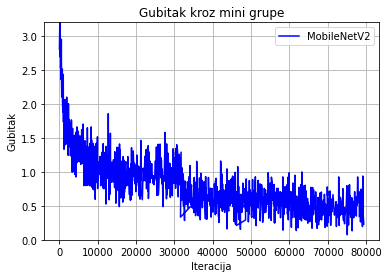

In [22]:
# plt.title("Gubitak kroz mini grupe")
# plt.xlabel("Iteracija")
# plt.ylabel("Gubitak")
# plt.grid()
# plt.plot(steps, loss_values, color=(0,0,1))
# plt.savefig()
plot_batch_loss(steps, loss_values, MBNET_COLOR, "BatchLossMBNetV2.png", "MobileNetV2")


Plot validation acc for mbnetv2 and slowfast

In [70]:
val_acc1 = load_pd_dataframe('run-mobilenet_v2-tag-val_batch_prec1.csv')
val_acc2 = load_pd_dataframe('run-mobilenet_v2-tag-val_epoch_prec1.csv')
val_acc_mbnet = merge_frames(val_acc1, val_acc2)
val_acc_slowfast = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-val_epoch_prec1.csv', "slowfast")
steps_mbnet, val_acc_mbnet_values = extract_steps_values(val_acc_mbnet)
steps_slowfast, val_acc_slowfast_values = extract_steps_values(val_acc_slowfast)

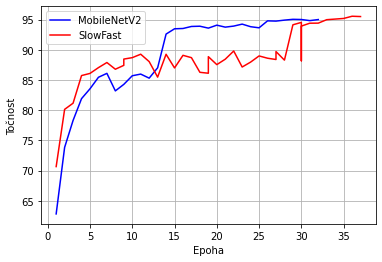

In [92]:
plt.ylabel("Točnost")
plt.xlabel("Epoha")

plt.plot(steps_mbnet, val_acc_mbnet_values, 'b', label="MobileNetV2")
plt.plot(steps_slowfast, val_acc_slowfast_values, 'r', label="SlowFast")
plt.legend()
plt.grid()

plt.savefig("PreciznostiMBNetEpohe.png")

Plot SlowFast train loss

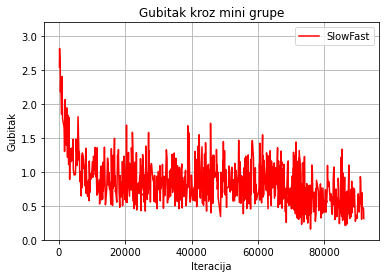

In [23]:
train_loss = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-train_batch_loss.csv', "slowfast")
steps, losess = extract_steps_values(train_loss)
plot_batch_loss(steps, losess, SLOWFAST_COLOR, "BatchLossSlowFast.png", "SlowFast")

Confusin matrix for MBNetV2

In [8]:
from sklearn.metrics import confusion_matrix
from datasets.dataset_utils import get_class_labels
from sklearn.metrics import ConfusionMatrixDisplay

LABEL_PATH = "../annotation_Jester/classInd_17_classes.txt"
CSV_PATH = "../test_results.csv"
with open(CSV_PATH, "r") as fd:
    y_y_pred = pd.read_csv(fd)
y_y_pred = y_y_pred.dropna(axis=0)
y_true = y_y_pred["y_true"].values
y_pred = y_y_pred["y_predicted"].values
labels = get_class_labels(LABEL_PATH)
label_names = labels.values()
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize="true")

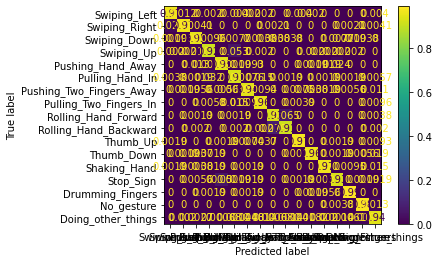

In [10]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=label_names)
display = display.plot()
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=label_names))

                          precision    recall  f1-score   support

            Swiping_Left       0.97      0.97      0.97       494
           Swiping_Right       0.97      0.97      0.97       486
            Swiping_Down       0.94      0.95      0.94       520
              Swiping_Up       0.94      0.92      0.93       508
       Pushing_Hand_Away       0.94      0.95      0.94       538
         Pulling_Hand_In       0.91      0.93      0.92       526
Pushing_Two_Fingers_Away       0.95      0.94      0.94       531
  Pulling_Two_Fingers_In       0.96      0.96      0.96       519
    Rolling_Hand_Forward       0.92      0.93      0.92       521
   Rolling_Hand_Backward       0.92      0.91      0.92       493
                Thumb_Up       0.97      0.97      0.97       539
              Thumb_Down       0.97      0.96      0.97       536
            Shaking_Hand       0.98      0.97      0.97       528
               Stop_Sign       0.95      0.93      0.94       536
        D

Precisions for slowfast

In [15]:
CSV_PATH = "../test_results_slow_fast_mobilenetv2.csv"
with open(CSV_PATH, "r") as fd:
    y_y_pred = pd.read_csv(fd)
y_y_pred = y_y_pred.dropna(axis=0)
y_true = y_y_pred["y_true"].values
y_pred = y_y_pred["y_predicted"].values
labels = get_class_labels(LABEL_PATH)
label_names = labels.values()
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=label_names))

                          precision    recall  f1-score   support

            Swiping_Left       0.97      0.97      0.97       494
           Swiping_Right       0.96      0.98      0.97       486
            Swiping_Down       0.95      0.93      0.94       520
              Swiping_Up       0.93      0.92      0.93       508
       Pushing_Hand_Away       0.93      0.96      0.95       538
         Pulling_Hand_In       0.92      0.94      0.93       526
Pushing_Two_Fingers_Away       0.96      0.95      0.95       531
  Pulling_Two_Fingers_In       0.96      0.95      0.96       519
    Rolling_Hand_Forward       0.95      0.93      0.94       521
   Rolling_Hand_Backward       0.93      0.95      0.94       493
                Thumb_Up       0.97      0.96      0.97       539
              Thumb_Down       0.98      0.96      0.97       536
            Shaking_Hand       0.98      0.98      0.98       528
               Stop_Sign       0.96      0.94      0.95       536
        D

Plot weighting function

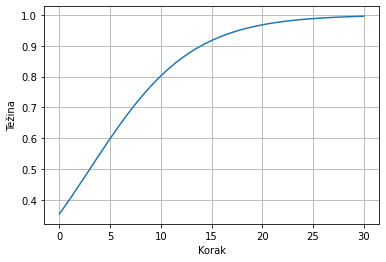

In [28]:
import numpy as np
x = np.linspace(0, 30)
y = 1/(1 + np.exp(-0.2 * (x-15//4)))

plt.xlabel("Korak")
plt.ylabel("Težina")
plt.grid()
plt.plot(x, y)
plt.savefig("WeightingFunction.png")